In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()


In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [5]:
dataset, metadeta = tfds.load('fashion_mnist', as_supervised = True , with_info = True )

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
dataset

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [7]:
metadeta

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path=PosixGPath('/tmp/tmpqljy68uztfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao a

In [8]:
train_dataset,test_dataset = dataset['train'],dataset['test']

In [9]:
num_train_examples = metadeta.splits['train'].num_examples
num_test_examples = metadeta.splits['test'].num_examples
print("Number of training examples :{}".format(num_train_examples))
print("Number of testing examples :{}".format(num_test_examples))

Number of training examples :60000
Number of testing examples :10000


In [10]:
class_names = [ 'Tshirt/top' , 'Trousers' , 'Pullover' , 'Dress' , 'Coat' ,
               'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle Boot']

Model Building

In [11]:
l1 = tf.keras.layers.Flatten(input_shape=(28,28,1))
l2 = tf.keras.layers.Dense(units=120,activation = tf.nn.relu)
l3 = tf.keras.layers.Dense(60,activation = tf.nn.relu)
l4 = tf.keras.layers.Dense(10,activation = tf.nn.softmax)
model = tf.keras.Sequential([l1,l2,l3,l4])

In [12]:
model.compile(optimizer = 'adam' ,
              loss = 'sparse_categorical_crossentropy' ,
              metrics = ['accuracy'])

In [13]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [14]:
print(60000/32)
print('no.of.iterations',(60000/32)*5)


1875.0
no.of.iterations 9375.0


In [15]:
print(9375.0 * 32)

300000.0


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 60)                7260      
                                                                 
 dense_2 (Dense)             (None, 10)                610       
                                                                 
Total params: 102,070
Trainable params: 102,070
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(train_dataset , epochs = 20 , steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/20
1875/1875 [==============================] - 13s 4ms/step - loss: 2.0066 - accuracy: 0.7472
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5976 - accuracy: 0.8037
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5285 - accuracy: 0.8209
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4930 - accuracy: 0.8289
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4677 - accuracy: 0.8359
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4415 - accuracy: 0.8452
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4234 - accuracy: 0.8507
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4066 - accuracy: 0.8563
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3860 - accuracy: 0.8613
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.38

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

1/1 [==============================] - 0s 84ms/step
[[4 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 4 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 2 0 6 0 0 0 0]
 [0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 2]]


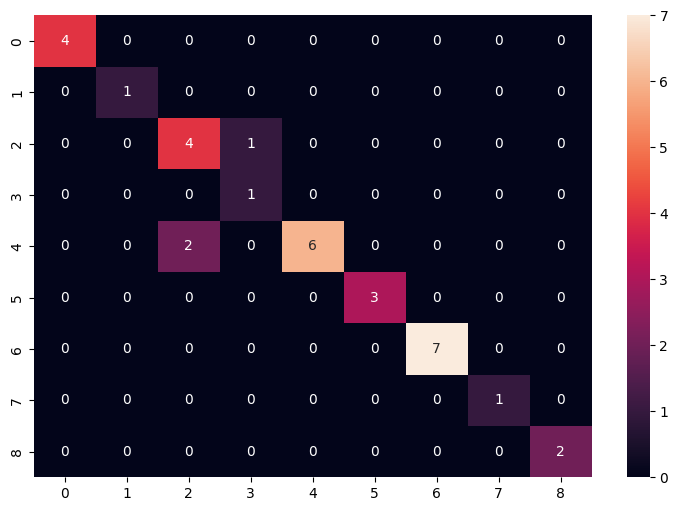

In [25]:
for d , y in test_dataset.take(1):
  y_pred = np.argmax(model.predict(d),axis=1)
  cf_matrix = confusion_matrix(y,y_pred)
  print(cf_matrix)
  sns.heatmap(cf_matrix , annot = True)